## Estadística Aplicada
Sesión 9b - 12 septiembre


In [1]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import CoxPHFitter

In [4]:
import seaborn as sns

In [7]:
## Datos

df_cancer=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')


In [6]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses

In [9]:
## Depurar y estadísticas descriptivas

## Recodificar variables dummy
df_cancer['status']=df_cancer['status']-1
df_cancer['sex']=df_cancer['sex']-1
# sex: 0:Hombre,1:Mujer

In [12]:
df_cancer=df_cancer.drop('inst',axis=1)

In [13]:
df_cancer.dtypes
#Todas las variables son númericas (enteros y decimales)

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [16]:
## Contar los valores perdidos/faltantes (missing values)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

Cuando hay valores pérdidos hay dos opciones:
1. Eliminar las observaciones con valores perdidos
2. Imputar datos (prom). Se utiliza cuando la muestra es muy chica ya que no arriesgas perder mucha información

In [17]:
## Estadísticas descriptivas
df_cancer.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,305.232456,0.723684,62.447368,0.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,5.000000,0.000000,39.000000,0.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,166.750000,0.000000,56.000000,0.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,255.500000,1.000000,63.000000,0.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,396.500000,1.000000,69.000000,1.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,1022.000000,1.000000,82.000000,1.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


El 39.47% son mujeres, el 72.46% de las personas fallecieron, la edad promedio es de 62.44, la edad más joven es 39 y la edad más alta es de 82. La media de ph.karno es mayor que la media de pat.karno que significa que los pacientes consideran su estado de salud mucho peor de lo que realmente es.

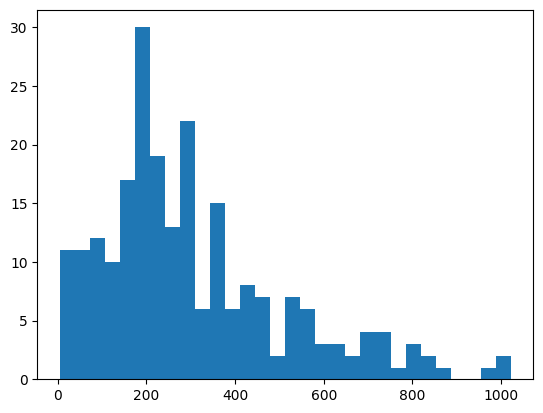

In [19]:
## Histograma del tiempo de supervivencia

plt.hist(df_cancer['time'],bins=30);

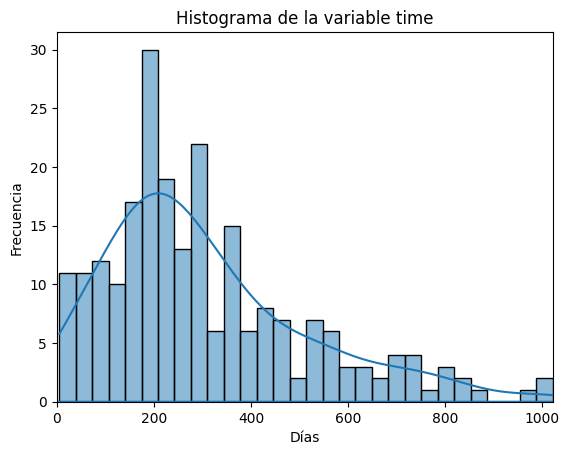

In [29]:
sns.histplot(df_cancer['time'],bins=30,kde=True)
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1022)
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable time')
plt.show()

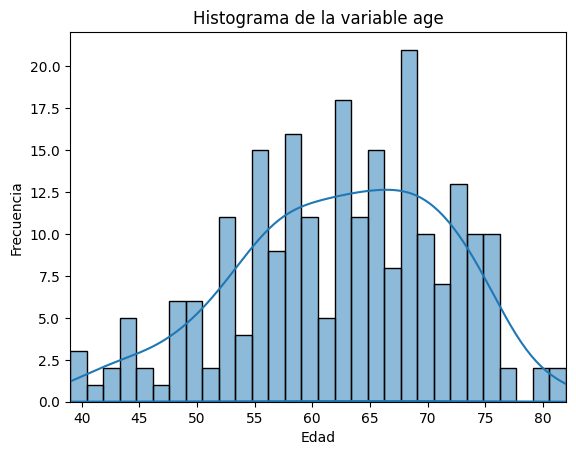

In [31]:
sns.histplot(df_cancer['age'],bins=30,kde=True)
sns.kdeplot(df_cancer['age'])
plt.xlim(39,82)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable age')
plt.show()

In [43]:
## Estimar el modelo

cph1=CoxPHFitter()
cph1.fit(df_cancer,df_cancer['time'],df_cancer['status'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [42]:
cph1.print_summary

<bound method CoxPHFitter.print_summary of <lifelines.CoxPHFitter>>